<a href="https://colab.research.google.com/github/LekshmiRM/python_assignments/blob/main/casestudy_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

**Data Set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/DSA_ICT/data/Training_data.csv'
df_churn=pd.read_csv(file_path)
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


**Pre processing**

**Handle missing values**

In [ ]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Remove duplicate rows**

In [ ]:
df_social=df_churn.drop_duplicates()

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Handle missing values**

In [ ]:
df_churn.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


**Gender -replace with uknnown values**

In [ ]:
df_churn['gender'] = df_churn['gender'].fillna('Unknown')

**Apply one hot encoding**

In [ ]:
pd.get_dummies(df_churn, columns=['gender'], drop_first=True)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,gender_Unknown
0,9509-MPYOD,0,No,No,35,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No,False,False
1,7746-AWNQW,0,No,No,28,No,No phone service,DSL,No,No,...,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No,False,False
2,2208-UGTGR,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No,True,False
3,4884-LEVMQ,0,Yes,No,39,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No,True,False
4,6682-VCIXC,0,Yes,Yes,43,No,No phone service,DSL,NaN,Yes,...,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,0,No,No,51,Yes,No,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No,True,False
5630,3908-MKIMJ,1,Yes,No,68,No,No phone service,DSL,Yes,Yes,...,No,No,Two year,Yes,Electronic check,41.95,2965.75,No,True,False
5631,4277-BWBML,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No,True,False
5632,9110-HSGTV,0,No,No,69,Yes,No,DSL,NaN,No,...,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No,False,False


online security handle missing value

In [ ]:
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].fillna('Unknown')

monthly charges

In [ ]:
df_churn['MonthlyCharges'] = df_churn['MonthlyCharges'].fillna(
    df_churn['MonthlyCharges'].median()
)

total charge convert to numeric


In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(
    df_churn['TotalCharges'], errors='coerce'
)

In [ ]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(0)

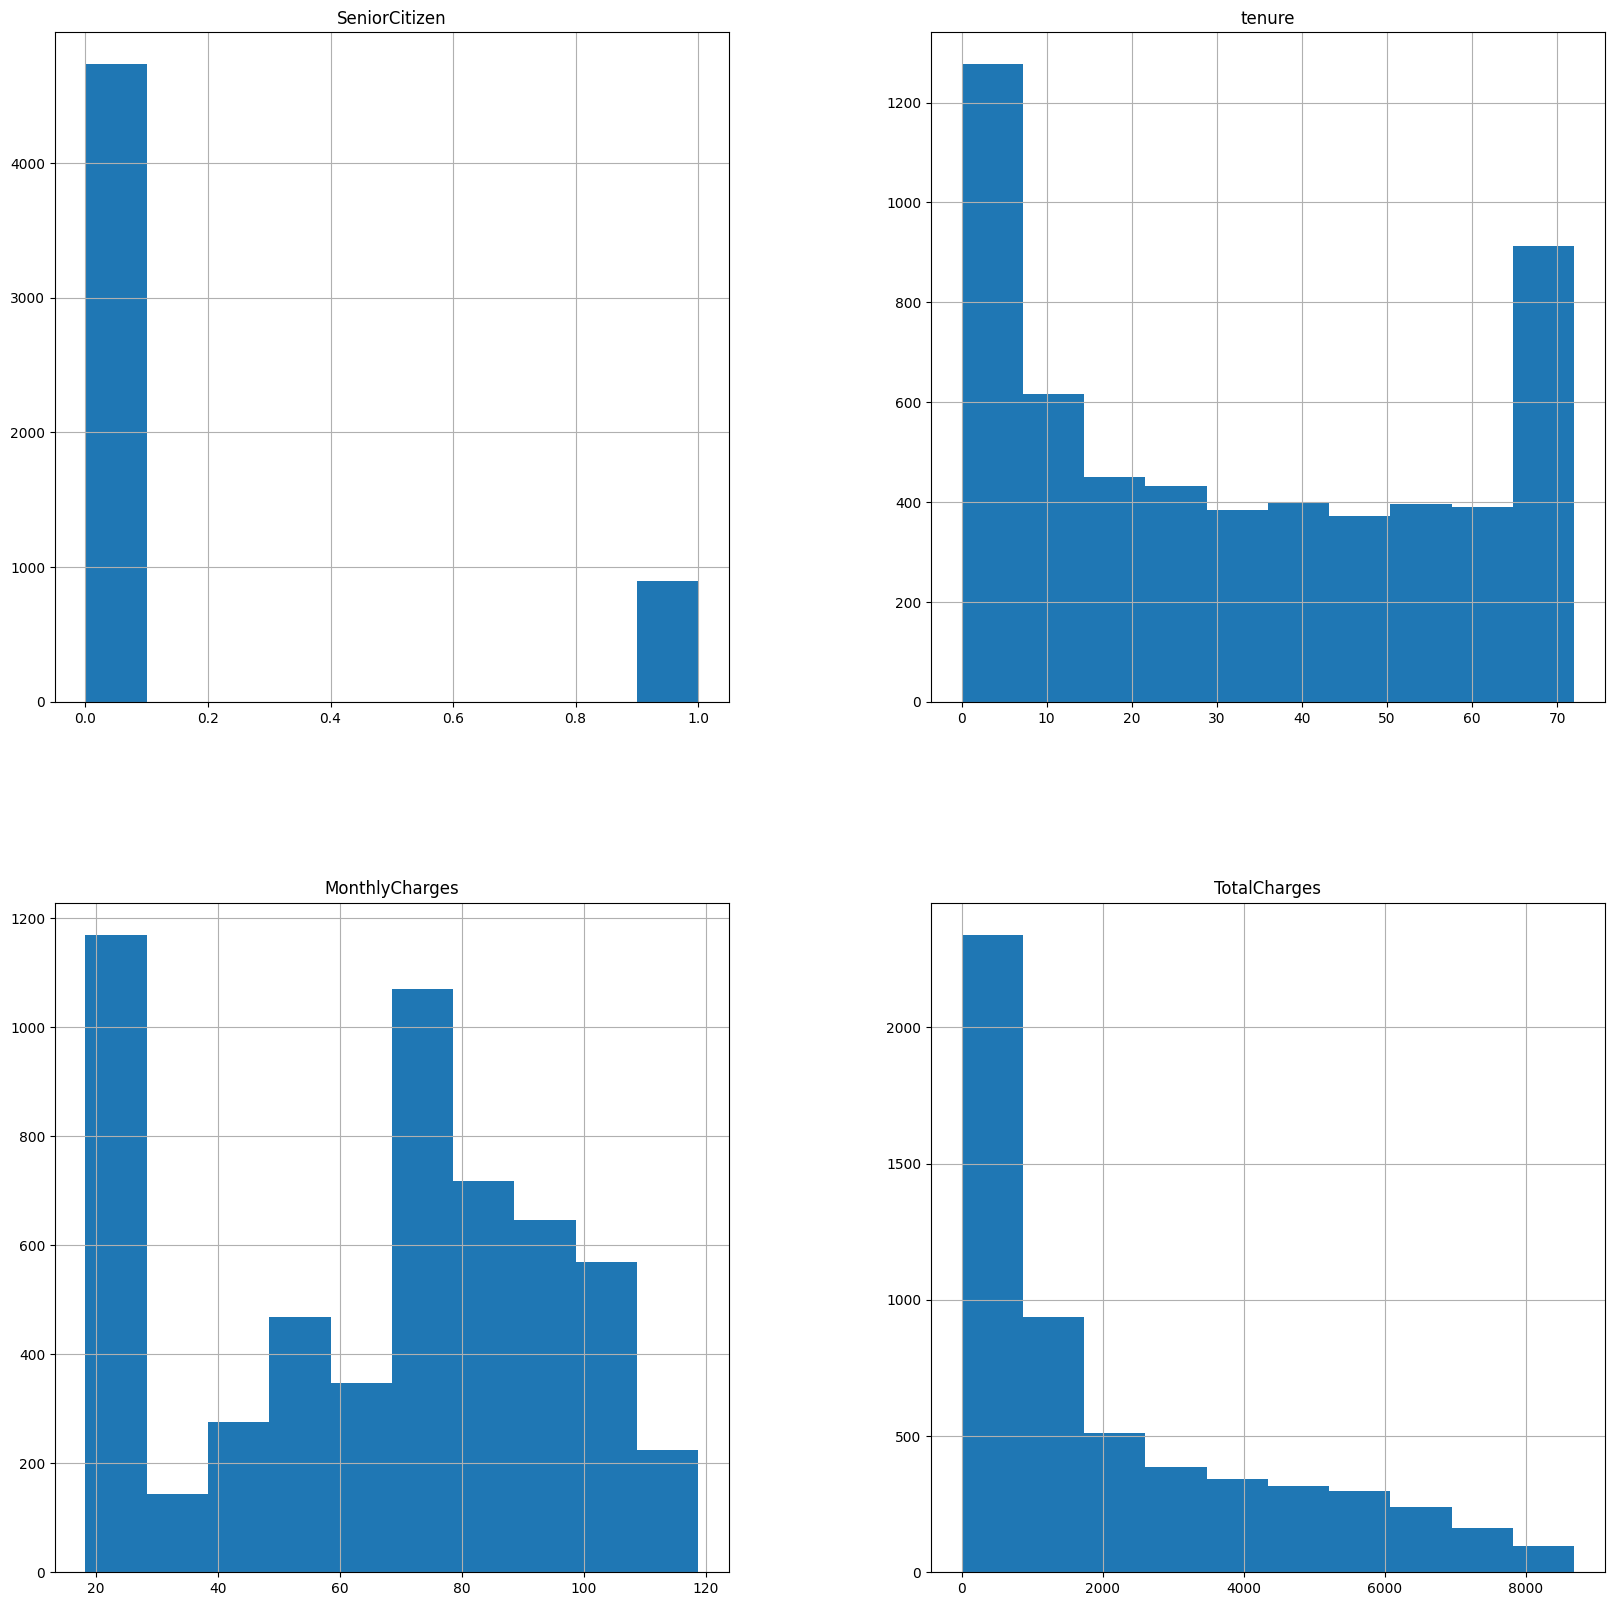

In [ ]:
df_churn.hist(figsize=(20,20))
plt.show()

In [ ]:
df_churn = df_churn.drop(columns=['customerID'])

Outlier removal (IQR, numeric only) by checking

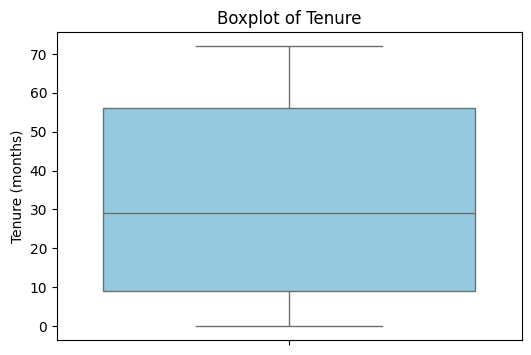

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_churn['tenure'], color='skyblue')
plt.title('Boxplot of Tenure')
plt.ylabel('Tenure (months)')
plt.show()

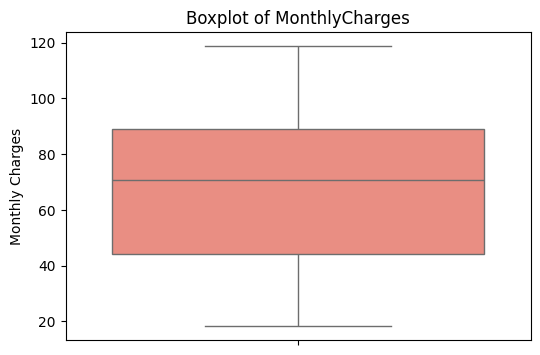

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_churn['MonthlyCharges'], color='salmon')
plt.title('Boxplot of MonthlyCharges')
plt.ylabel('Monthly Charges')
plt.show()

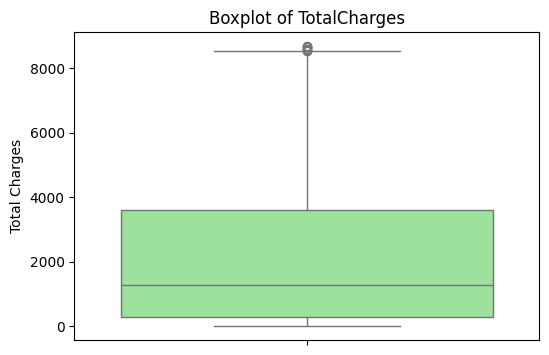

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_churn['TotalCharges'], color='lightgreen')
plt.title('Boxplot of TotalCharges')
plt.ylabel('Total Charges')
plt.show()

outlier present in total charges so need to handle

In [ ]:
#total charge
Q1=np.percentile(df_churn['TotalCharges'],25)
Q3=np.percentile(df_churn['TotalCharges'],75)
IQR=Q3-Q1
print(Q1,Q3,IQR)



296.4375 3590.5375 3294.1


In [ ]:
up_val=Q3+1.5*IQR
low_val=Q1-1.5*IQR
print(up_val,low_val)

8531.6875 -4644.7125


In [ ]:
for x in df_churn['TotalCharges']:
  if x > up_val or x < low_val:
    print(x)

8670.1
8684.8
8594.4
8543.25
8672.45
8564.75


:clip to replace upper outlier value with upper value lower outlier with lower value (wihin range)

In [ ]:
df_churn['TotalCharges']=df_churn['TotalCharges'].clip(lower=low_val,upper=up_val)

In [ ]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,Female,0,Yes,Yes,43,No,No phone service,DSL,Unknown,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,Male,1,Yes,No,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,Female,0,No,No,69,Yes,No,DSL,Unknown,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30,No


**Visualize correlations,**

In [ ]:
num_cols = df_churn.select_dtypes(include=['int64','float64']).columns.tolist()
corr_matrix = df_churn[num_cols].corr()
print(corr_matrix)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.022672        0.205024      0.097817
tenure               0.022672  1.000000        0.232216      0.777377
MonthlyCharges       0.205024  0.232216        1.000000      0.590459
TotalCharges         0.097817  0.777377        0.590459      1.000000


**heat map**

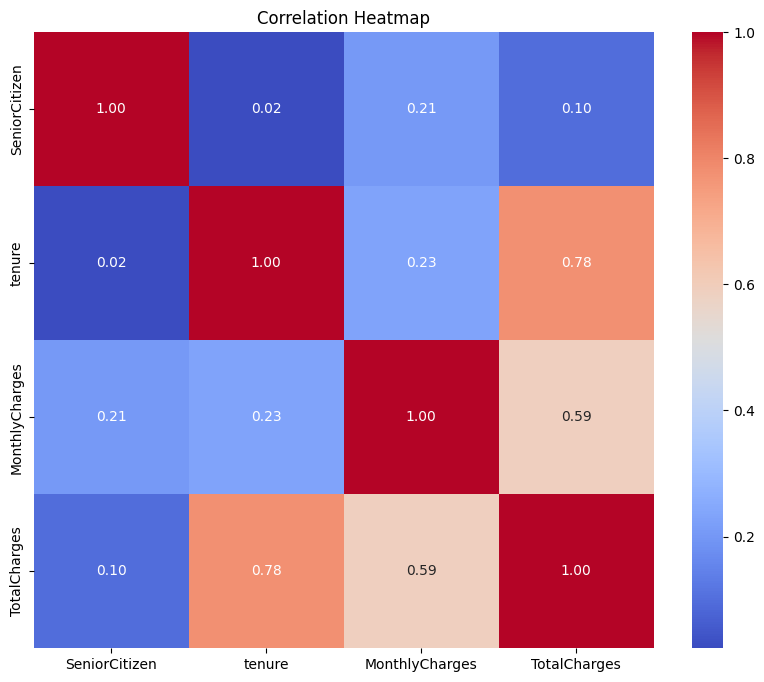

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

**Encoding**

In [ ]:
le = LabelEncoder()
df_churn['gender'] = le.fit_transform(df_churn['gender'])

In [ ]:
cat_cols = df_churn.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Encoding techniques

Label Encoding (Binary or ordinal categorical variables)

In [ ]:
le = LabelEncoder()
df_churn['Partner'] = le.fit_transform(df_churn['Partner'])
df_churn['Dependents'] = le.fit_transform(df_churn['Dependents'])

One-Hot Encoding (Multi-class categorical variables)

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['OnlineSecurity', 'Contract', 'PaymentMethod'], drop_first=True)

Mapping categories to numbers (manual)

In [ ]:
df_churn['InternetService'] = df_churn['InternetService'].map({
    'DSL': 1,
    'Fiber optic': 2,
    'No': 0
})

Encode the target (Churn)

In [ ]:
df_churn['Churn'] = df_churn['Churn'].map({'Yes':1, 'No':0})

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int64  
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   int64  
 5   PhoneService                           5634 non-null   object 
 6   MultipleLines                          5634 non-null   object 
 7   InternetService                        5634 non-null   int64  
 8   OnlineBackup                           5634 non-null   object 
 9   DeviceProtection                       5634 non-null   object 
 10  TechSupport                            5634 non-null   object 
 11  Stre

In [ ]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Unknown,OnlineSecurity_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,35,Yes,No,0,No internet service,No internet service,...,700.45,0,True,False,False,True,False,False,False,True
1,0,0,0,0,28,No,No phone service,1,No,Yes,...,961.40,0,False,False,False,False,False,False,False,True
2,1,0,0,0,56,Yes,Yes,2,Yes,No,...,5581.05,0,False,False,False,False,False,False,True,False
3,1,0,1,0,39,Yes,No,0,No internet service,No internet service,...,790.00,0,True,False,False,False,True,False,False,False
4,0,0,1,1,43,No,No phone service,1,Yes,No,...,2151.60,0,False,True,False,True,False,False,False,False


In [ ]:
le = LabelEncoder()
df_churn['PhoneService'] = le.fit_transform(df_churn['PhoneService'])

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['MultipleLines'], drop_first=True ,dtype=int)

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['OnlineBackup'], drop_first=True,dtype=int)

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['DeviceProtection'], drop_first=True,dtype=int)

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['TechSupport'], drop_first=True,dtype=int)

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['StreamingTV'], drop_first=True,dtype=int)

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['StreamingMovies'], drop_first=True,dtype=int)

In [ ]:
le = LabelEncoder()
df_churn['PaperlessBilling'] = le.fit_transform(df_churn['PaperlessBilling'])

**Scaling**

**MInMax Scaling**

In [ ]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
std_scalar=StandardScaler()


Train Test split

In [ ]:
#Splitting into target and features
X = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']


# splitting dATA INTO TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=3)
X_train.shape

(4507, 30)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4507, 30)
(1127, 30)
(4507,)
(1127,)


ML MODELLING

logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# initialising the ML model
log_reg_model=LogisticRegression()
# training the model using training features and training targets
log_reg_model.fit(X_train,y_train)
# predict using the model and test features
y_pred_log_reg=log_reg_model.predict(X_test)
# Evaluating the ML model


Acc_log_reg=accuracy_score(y_test,y_pred_log_reg)
Prec_log_reg=precision_score(y_test,y_pred_log_reg)
Rec_log_reg=recall_score(y_test,y_pred_log_reg)
f1_log_reg=f1_score(y_test,y_pred_log_reg)

print("The accuracy of Logistics regression model is :",Acc_log_reg)
print("The precision of Logistics regression model is :",Prec_log_reg)
print("The recall of Logistics regression model is :",Rec_log_reg)
print("The f1 score of Logistics regression model is :",f1_log_reg)
confusion_matrix(y_test,y_pred_log_reg)

The accuracy of Logistics regression model is : 0.7897071872227152
The precision of Logistics regression model is : 0.5931558935361216
The recall of Logistics regression model is : 0.5454545454545454
The f1 score of Logistics regression model is : 0.5683060109289617


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[734, 107],
       [130, 156]])

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

KNN

In [ ]:
#we need to figure out the optima value for k.
# to do that we will check which value of k is giving highest accuracy
acc_list=[]
neighbors_range=np.arange(1,20)
for k in neighbors_range:
  #INITIALIZING the clasifier for iteration
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  #training the model

  classifier.fit(X_train,y_train)
  #predict using the trained ML model
  y_pred=classifier.predict(X_test)
  #evaluate the ML MODEL
  acc=accuracy_score(y_test,y_pred)
  #populate acc_list with accuracy achieved for each value of 'k'
  acc_list.append(acc)

In [ ]:
df_churn['Tenure_Contract'] = (
    df_churn['tenure'] *
    (
        df_churn.get('Contract_One year', 0) * 2 +
        df_churn.get('Contract_Two year', 0) * 3 +
        df_churn.get('Contract_Month-to-month', 0) * 1
    )
)


In [ ]:
print(df_churn.columns)



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Unknown', 'OnlineSecurity_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')
